##### <img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Predictive analytics</center>


# Challenge S4: Modelos regresivos - Predicción bursátil

## Objetivo

El objetivo de este challenge es utilizar las técnicas de regresión aprendidas, para ello, vamos a realizar una predicción bursátil.

## 1. Configuración del entorno

Cargamos los paquetes que vamos a utilizar en la sesión.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Análisis de los datos de partida

En este caso vamos a utilizar un dataset obtenido de Yahoo finance, en el que se incluye la cotización del índice del IBEX desde su origen:
https://es.finance.yahoo.com/quote/%5EIBEX/history?p=%5EIBEX



**Carga el fichero IBEX.csv y analiza sus datos.**
 - **¿Qué variables tenemos?**
 - **¿Hay valores nulos? ¿A qué se deben esos valores? **

In [2]:
## Lectura del dataframe
ibex = pd.read_csv('IBEX.csv')

In [3]:
ibex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6587 entries, 0 to 6586
Data columns (total 7 columns):
Date         6587 non-null object
Open         6450 non-null float64
High         6450 non-null float64
Low          6450 non-null float64
Close        6450 non-null float64
Adj Close    6450 non-null float64
Volume       6450 non-null float64
dtypes: float64(6), object(1)
memory usage: 360.3+ KB


In [4]:
ibex.head()

Date         Open         High          Low        Close  \
0  1993-07-06  2814.899902  2829.699951  2814.899902  2818.000000   
1  1993-07-07  2818.000000  2821.500000  2799.000000  2818.699951   
2  1993-07-08  2823.199951  2840.199951  2823.199951  2832.800049   
3  1993-07-09  2832.800049  2844.000000  2822.399902  2830.800049   
4  1993-07-12  2826.800049  2826.800049  2814.600098  2826.399902   

     Adj Close  Volume  
0  2817.997070     0.0  
1  2818.697021     0.0  
2  2832.797119     0.0  
3  2830.797119     0.0  
4  2826.396973     0.0

In [5]:
## Vamos a ver qué días tienen valores nulos y a qué se corresponden
ibex[ibex['Close'].isnull()].tail()

Date  Open  High  Low  Close  Adj Close  Volume
3059  2005-03-28   NaN   NaN  NaN    NaN        NaN     NaN
3254  2005-12-26   NaN   NaN  NaN    NaN        NaN     NaN
3514  2007-01-01   NaN   NaN  NaN    NaN        NaN     NaN
3766  2007-12-24   NaN   NaN  NaN    NaN        NaN     NaN
6069  2017-01-02   NaN   NaN  NaN    NaN        NaN     NaN

Como podemos observar , se corresponden con los días de cierre de la bolsa

## 3. Transformación del dataset

Vamos a adaptar nuestros datos de entrada a un dataset con el que poder trabajar. Para ello vamos a crear nuestro atributo X y nuestra variable y.

- **ibex_X**: variable de tipo índice para la fecha --> Vamos a crear una variable OffsetDays resultado de la diferencia entre la fecha y el primer día de nuestro dataframe. Previamente debemos eliminar los valores nulos de esta variable y convertirla al tipo fecha si queremos hacer la resta de dos fechas.
   
   Notas: 
   
   Para pasar un timedelta a entero en días se puede usar serie.dt.days, donde serie es la serie que queremos convertir.
   
   `sklearn` espera que los atributos vengan en un array 2d aunque tengan sólo una columna, por eso es preciso transformarlos a una matriz 2D.
   
   
- **ibex_y**: valor de cierre de la acción

** Crea el dataset con las indicaciones anteriores**

In [6]:
## Eliminamos los valores null que se corresponden con días de cierre de la bolsa
ibex = ibex.dropna()
ibex.info()
ibex.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6450 entries, 0 to 6586
Data columns (total 7 columns):
Date         6450 non-null object
Open         6450 non-null float64
High         6450 non-null float64
Low          6450 non-null float64
Close        6450 non-null float64
Adj Close    6450 non-null float64
Volume       6450 non-null float64
dtypes: float64(6), object(1)
memory usage: 403.1+ KB


Date         Open         High          Low        Close  \
0  1993-07-06  2814.899902  2829.699951  2814.899902  2818.000000   
1  1993-07-07  2818.000000  2821.500000  2799.000000  2818.699951   
2  1993-07-08  2823.199951  2840.199951  2823.199951  2832.800049   
3  1993-07-09  2832.800049  2844.000000  2822.399902  2830.800049   
4  1993-07-12  2826.800049  2826.800049  2814.600098  2826.399902   

     Adj Close  Volume  
0  2817.997070     0.0  
1  2818.697021     0.0  
2  2832.797119     0.0  
3  2830.797119     0.0  
4  2826.396973     0.0

In [7]:
from datetime import date
## Convertir campo fecha para facilitar las operaciones
ibex['Date'] = pd.to_datetime(ibex['Date'], format='%Y-%m-%d').dt.date
## Calcular índice como la diferencia entre esta fecha y el primer día del dataframe
ibex['OffsetDays'] = ibex['Date'] - date(1993, 7, 6)
ibex['OffsetDays'] = ibex['Date'] - ibex['Date'].iloc[0]
ibex.head()
ibex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6450 entries, 0 to 6586
Data columns (total 8 columns):
Date          6450 non-null object
Open          6450 non-null float64
High          6450 non-null float64
Low           6450 non-null float64
Close         6450 non-null float64
Adj Close     6450 non-null float64
Volume        6450 non-null float64
OffsetDays    6450 non-null timedelta64[ns]
dtypes: float64(6), object(1), timedelta64[ns](1)
memory usage: 453.5+ KB


In [8]:
ibex_X = ibex.OffsetDays.values
ibex_X = ibex_X.reshape(ibex_X.shape[0], -1)
ibex_X

array([[                 0],
       [    86400000000000],
       [   172800000000000],
       ...,
       [805075200000000000],
       [805161600000000000],
       [805248000000000000]], dtype='timedelta64[ns]')

In [9]:
## Como variable y utilizaremos el valor de cierre de la acción
ibex_y = ibex.Close
ibex_y

0       2818.000000
1       2818.699951
2       2832.800049
3       2830.800049
4       2826.399902
5       2843.399902
6       2851.100098
7       2843.699951
8       2830.500000
9       2822.199951
10      2840.000000
11      2830.500000
12      2838.899902
13      2855.899902
14      2873.000000
15      2876.600098
16      2901.899902
17      2963.199951
18      2981.199951
19      3019.699951
20      2994.000000
21      2985.800049
22      2981.199951
23      2993.800049
24      2989.300049
25      3002.899902
26      3032.399902
27      3087.000000
28      3112.699951
29      3113.899902
           ...     
6557    9102.700195
6558    9098.900391
6559    9077.200195
6560    9179.599609
6561    9061.700195
6562    9012.200195
6563    8764.500000
6564    8815.500000
6565    8660.000000
6566    8735.500000
6567    8853.400391
6568    8926.299805
6569    8886.099609
6570    8812.500000
6571    8700.799805
6572    8769.099609
6573    8596.500000
6574    8556.799805
6575    8480.599609


**¿Por qué no utilizamos el índice del propio dataframe en vez del campo que hemos calculado (OffsetDays)?**

Para poder medir mejor el espacio entre valores.

## 4. Preprocesamiento de los datos

En este caso para hacer un poco más completo el análisis vamos a realizar un paso previo que resulta recomendable siempre que hagamos una regresión y es la normalización.

Normalizar una variable consiste en transformar dicha variable de manera que su media sea 0 ($\mu = 0$) y su desviación tipica 1 ($\delta = 1$)

$$X_{norm} = \frac{X_i - \mu}{\delta}$$

La normalización es necesaria en muchos algoritmos porque:

* Nos permite trabajar con un rango de datos controlado de manera que no perdamos precisión en las operaciones
* La variables están centradas, luego eliminamos sesgos en los datos 
* Algunos modelos realizan asunciones sobre la distribución de la entrada de los datos

Con `sklearn` normalizar es muy sencillo:

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(ibex_X)
ibex_X_scaled = scaler.transform(ibex_X)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype timedelta64[ns] was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype timedelta64[ns] was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
print(ibex_X_scaled)

[[-1.74187662]
 [-1.74150489]
 [-1.74113317]
 ...
 [ 1.7218299 ]
 [ 1.72220163]
 [ 1.72257335]]


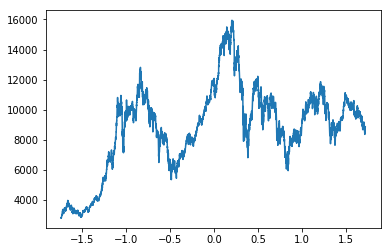

In [12]:
## Vemos los resultados
plt.plot(ibex_X_scaled, ibex_y)

## 5. Evaluación

Una vez que tenemos los datos adaptados al formato adecuado podemos empezar a entrenar modelos. Como siempre, antes de empezar con el conjunto de test, suele ser conveniente entrenar el modelo y evaluarlo con el propio conjunto de entrenamiento, para ello vamos a crear una función similar a la que usamos en el worksheet para entrenar, predecir y representar los resultados.

**Completa la función evalua_modelo**

In [13]:
def evalua_modelo(modelo, X_train, X_test, y_train, y_test):
    
    ## Entrenamiento del modelo
    modelo.fit(X_train, y_train)
    
    ## Predicción sobre el conjunto de entrenamiento
    y_pred_train = modelo.predict(X_train)
    
    ## Evaluación sobre el conjunto de entrenamiento
    score_train = modelo.score(X_train, y_train)
    
    ## Predicción sobre el conjunto de test
    y_pred_test = modelo.predict(X_test)
    
    ## Evaluación sobre el conjunto de entrenamiento
    score_test = modelo.score(X_test, y_test)
    
    ## Representación de los resultados
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,6))
    
    ax1.plot(X_train, y_train, 'o', label='Train')
    ax1.plot(X_train, y_pred_train, '*', label='Prediction')
    ax1.set_title('Conjunto de entrenamiento (Score %.2f)' % score_train)
    ax1.legend()

    ax2.plot(X_test, y_test, 'o',color='green',label='Test')
    ax2.plot(X_test, y_pred_test, '*',color='darkorange',label='Prediction')
    ax2.legend()
    ax2.set_title('Conjunto de test (Score %.2f)' % score_test)
    
    f.show()
    
    return modelo

**Separa el dataset en conjunto de entrenamiento y test, para empezar puedes utilizar un conjunto de test del 10%**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ibex_X_scaled, ibex_y, test_size=0.1, random_state=42, shuffle=False)

**Utiliza al menos dos modelos de los vistos en la sesión anterior para entrenar y comparar los resultados utilizando la función que hemos definido antes evalua_modelo.**
- **¿Qué score has conseguido?**
- **¿Qué modelos has elegido? ¿Por qué?**


In [3]:
## Importar los modelos que vamos a utilizar de las correspondientes librerías
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


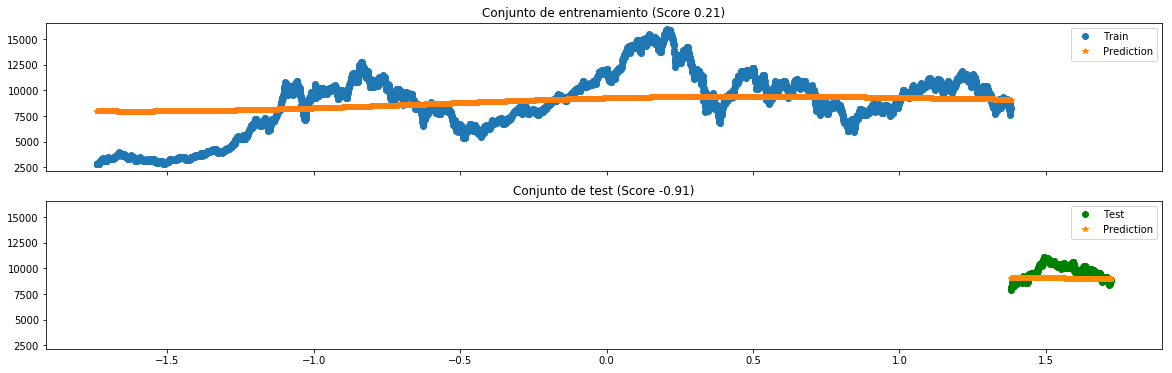

In [58]:
modelo1 = evalua_modelo(SVR(), X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


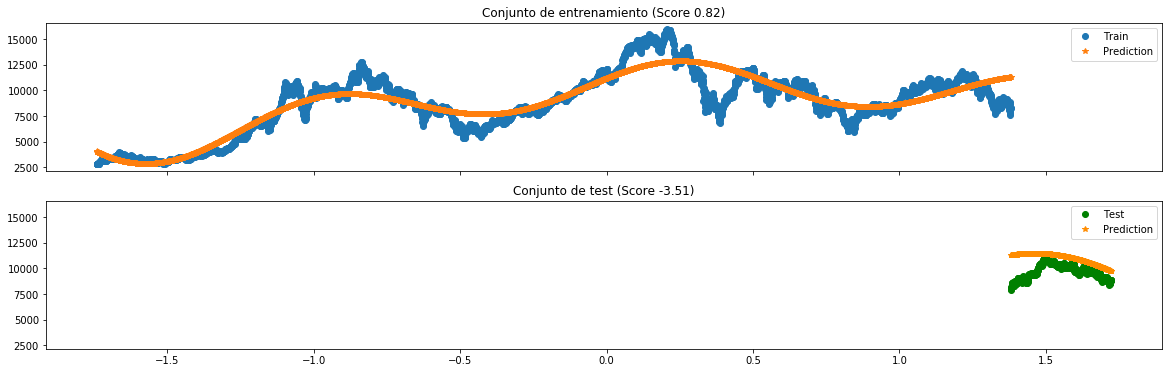

In [70]:
modelo2 = evalua_modelo(SVR(C=2000), X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


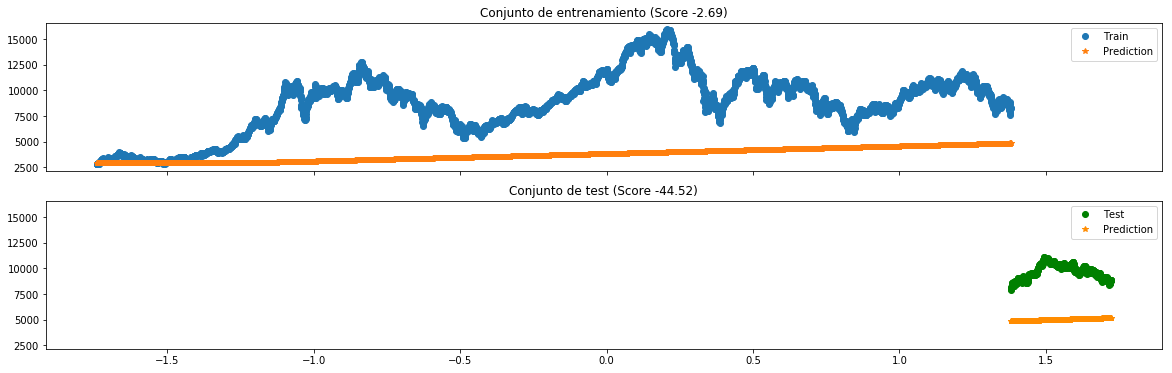

In [60]:
modelo3 = evalua_modelo(MLPRegressor(), X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

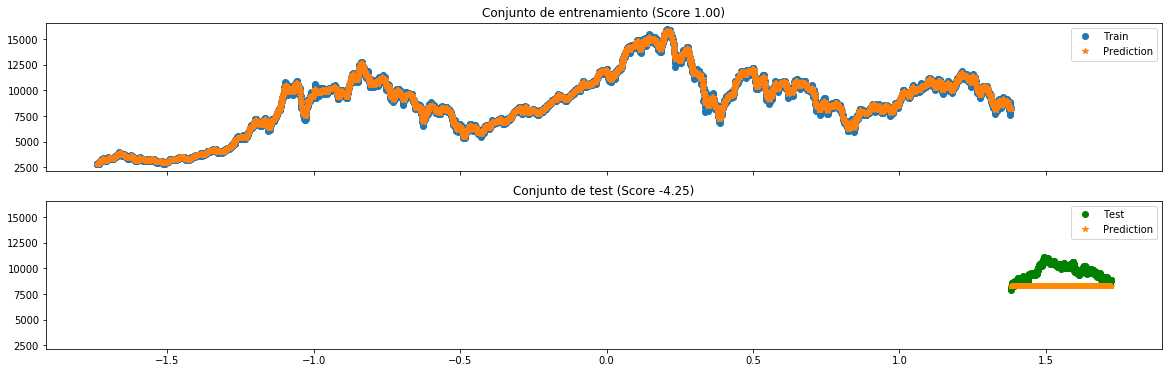

In [61]:
from sklearn.neighbors import KNeighborsRegressor
evalua_modelo(KNeighborsRegressor(n_neighbors=10), X_train, X_test, y_train, y_test)

Como podemos observar, de los modelos elegidos, con el que obtenemos una predicción más precisa es con SVR con una C=2000.

## 6. Predicción

Para el modelo anterior que mejor consideres, **realiza una predicción a futuro, por ejemplo, ¿qué ocurrirá dentro de 30 días?**

**Según tus resultados, ¿deberíamos comprar o vender acciones a día de hoy?**
- Compramos si el valor predicho es mayor al valor actual, es decir, las acciones van a subir.
- Vendemos si el valor predicho es menor al valor actual, es decir, las acciones vana a bajar.


In [71]:
## Tenemos que tener en cuenta el último valor y añadirle los días para realizar la predicción a esos días
pos_actual = int(ibex_X[-1][0])
dias = 30
## Aplicamos la misma normalización que al resto de datos
x_pred = scaler.transform([[pos_actual+dias]])

In [82]:
## Hacemos la predicción
y_pred = modelo2.predict(x_pred)
ibex_y = np.array(ibex_y)

print('Valor predicho: {}'.format(y_pred[0]))
print('Valor actual: {}'.format(ibex_y[-1]))

Valor predicho: 9726.65838301303
Valor actual: 8877.099609


**¿Qué puedes decir de la predicción? ¿Tenemos la misma situación en 1993 que en 2019?**

Podemos observar que la predicción no se aproxima al valor actual. Esto se debe a que estamos cogiendo todo el histórico de las acciones y los valores de la bolsa son muy variables y dependen de la economía global en un momento dado. Por tanto, la situación mundial en 1993 no era la misma que la que tenemos ahora, por lo que los valores de ibex tampoco lo serán.

## 7. Predicción mejorada

Vamos a hacer una predicción mejorada, para ello, vamos a usar un procesamiento de la información en ventanas: Por cada elemento de la serie, entrena un regresor con un conjunto de datos de tamaño "long_ventana_entrenamiento" y realiza una predicción a "prediccion_a_n_dias".

**Completa la función procesa_en_ventanas**

In [4]:
def procesa_en_ventanas(regressor, X, y, long_ventana_entrenamiento, prediccion_a_n_dias):
    '''
    Por cada elemento de la serie, entrena un regresor con un conjunto de datos de tamaño
    "long_ventana_entrenamiento" y realiza una predicción a "prediccion_a_n_dias"
    
    Obtiene como entrada:
    * Modelo de regresión
    * Vectores X e y
    * Tamaño de la ventana de entrenamiento
    * N de días a realizar la predicción
    
    Devuelve 4 listas con un punto cada predicción:
    * pos_actual: posición actual de la serie
    * valor_actual: valor actual de la serie
    * pos_pred: posición predicha de la serie (pos_actual + prediccion_a_n_dias)
    * valor_pred: valor predicho de la serie
    
    Por ejemplo: procesa_en_ventanas(SVR(C=5), ibex_X, ibex_y, 60, 30) por cada punto de la 
    serie entrena un modelo con los 60 últimos días y realiza una predicción a 30 días.
    '''
   
    ## Inicialización de variables
    pos_actual = []
    valor_actual = []
    pos_pred = []
    valor_pred = []
    
    inicio_serie = long_ventana_entrenamiento
    fin_serie = X.shape[0] - (prediccion_a_n_dias + 1)
    
    for i in range(inicio_serie, fin_serie):
        
        ## Ventana de entrenamiento
        ini_train = i - long_ventana_entrenamiento
        fin_train = i
        ventana_X_train = X[ini_train : fin_train]
        ventana_y_train = y[ini_train : fin_train]
        
        ## Predicción a n días
        pos_test = i + prediccion_a_n_dias
        ventana_X_test = X[pos_test : pos_test + 1]
        ventana_y_test = y[pos_test : pos_test + 1]

        ## Entrenamos nuestro modelo
        regressor.fit(ventana_X_train, ventana_y_train)
        ## Hacemos la predicción
        y_pred = regressor.predict(ventana_X_test)
        
        ## Actualizamos las variables
        pos_actual.append(ventana_X_train[-1][0])
        valor_actual.append(ventana_y_train[-1])
        pos_pred.append(ventana_X_test[0][0])
        valor_pred.append(y_pred[0])
        
        if i % 75 == 0:
            print(".", end='')
    print("")
    
    ## Representamos los resultados
    plt.figure(figsize=(20, 8))
    plt.plot(X, y, color="#FF3333")
    
    lines = []
    lines.append(plt.scatter(pos_pred, valor_pred, s=1, label="Predicción a " + str(prediccion_a_n_dias) + " dias"))
    plt.legend(handles=lines)
    
    plt.grid(color='lightgrey', linestyle="dashed", linewidth=1)
    
    return pos_actual, valor_actual, pos_pred, valor_pred

In [6]:
ibex_y

NameError: name 'ibex_y' is not defined

** Utiliza la función anterior para realizar la predicción, elige modelo a utilizar y el tamaño de la ventana de entrenamiento y los días a los que quieres hacer la predicción**

In [5]:
pos_actual, valor_actual, pos_pred, valor_pred = procesa_en_ventanas(SVR(C=5), ibex_X_scaled, ibex_y, 60, 30)

NameError: name 'ibex_X_scaled' is not defined

### 7.1.- Compra y venta de acciones

Una vez que tenemos nuestra predicción, vamos a ver cómo nos iría en la compra y venta de acciones. Para ello creamos un algoritmo con el siguiente diagrama de flujo:

<img src="Diagrama1.jpg">

**Completa el siguiente bloque en función del diagrama de flujo anterior**

In [85]:
capital = 1000.0
acciones = 0.0

valor_compra = 0.0

print("[%04d] Capital=%.2f, Acciones=%.2f" % (0, capital, acciones))

for i in range(len(pos_actual)):
    if capital == 0.0 and acciones == 0.0:
        print("[End] nos hemos quedado sin capital ;-(")
        break
    
    ## Calculamos la diferencia entre el valor predicho y el actual 
    dif = valor_pred[i] - valor_actual[i]
    
    ## Evaluamos esa diferencia
    ## RAMA SI
    if dif > 0:
        ## Evaluamos el capital
        ## RAMA SI
        if capital > 0:
            ## Esperamos que el valor de la suba, compramos
            print("[%04d] Compramos a %.2f (acciones=%.2f)" % (i, valor_actual[i], acciones))
            acciones_a_comprar = capital / valor_actual[i]
            acciones += acciones_a_comprar
            capital = 0.0
            valor_compra = valor_actual[i]
            print("[%04d] Capital=%.2f, Acciones=%.2f" % (i, capital, acciones))
        ## RAMA NO    
        else:
             pass
    
    ## RAMA NO
    else:
        ## Evaluamos las acciones
        ## RAMA SI
        if acciones > 0:
            ## Esperamos que el valor baje, vendemos
            print("[%04d] Vendemos a %.2f (acciones=%.2f compradas_a=%.2f)" % (i, valor_actual[i], acciones, valor_compra))
            capital += valor_actual[i]  * acciones
            acciones = 0.0
            print("[%04d] Capital=%.2f, Acciones=%.2f" % (i, capital, acciones))
        ## RAMA NO
        else:
            pass

if acciones > 0.0:
    capital += acciones * valor_actual[-1]

print("Capital final: %f" % capital)
print("Acciones finales: %f" % acciones)


[0000] Capital=1000.00, Acciones=0.00
[0040] Compramos a 3288.90 (acciones=0.00)
[0040] Capital=0.00, Acciones=0.30
[0041] Vendemos a 3320.20 (acciones=0.30 compradas_a=3288.90)
[0041] Capital=1009.52, Acciones=0.00
[0043] Compramos a 3313.10 (acciones=0.00)
[0043] Capital=0.00, Acciones=0.30
[0045] Vendemos a 3348.50 (acciones=0.30 compradas_a=3313.10)
[0045] Capital=1020.30, Acciones=0.00
[0102] Compramos a 3710.00 (acciones=0.00)
[0102] Capital=0.00, Acciones=0.28
[0104] Vendemos a 3739.70 (acciones=0.28 compradas_a=3710.00)
[0104] Capital=1028.47, Acciones=0.00
[0105] Compramos a 3656.80 (acciones=0.00)
[0105] Capital=0.00, Acciones=0.28
[0109] Vendemos a 3757.40 (acciones=0.28 compradas_a=3656.80)
[0109] Capital=1056.76, Acciones=0.00
[0110] Compramos a 3726.70 (acciones=0.00)
[0110] Capital=0.00, Acciones=0.28
[0114] Vendemos a 3732.40 (acciones=0.28 compradas_a=3726.70)
[0114] Capital=1058.38, Acciones=0.00
[0118] Compramos a 3705.10 (acciones=0.00)
[0118] Capital=0.00, Acciones

** ¿Cuánto dinero has ganado? ¿Puedes mejorarlo?**

He ganado 226$. Sí, se podría mejorar, tal y como se menciona abajo, usando un procesamiento en ventanas para tener más en cuenta los últimos valores de bolsa y añadiendo comisiones en la compra/venta.

## 8. Extras (no obligatorios)

Hemos visto un procemiento sencillo, pero que podemos mejorar considerablemente, para ello se podrían realizar algunos extras como:
- Incluir el cálculo del score en la función procesa_en_ventanas, para poder evaluar mejor nuestros resultados.
- Mejorar el procedimiento de compra/venta incluyendo:
    - alguna comisión en la compra y/o en la venta
    - alguna condición para cortar la venta de acciones, por ejemplo, no vender si se alcanza un capital mayor a una cantidad.

In [88]:
capital = 1000.0
acciones = 0.0

valor_compra = 0.0

print("[%04d] Capital=%.2f, Acciones=%.2f" % (0, capital, acciones))

for i in range(len(pos_actual)):
    if capital == 0.0 and acciones == 0.0:
        print("[End] nos hemos quedado sin capital ;-(")
        break
    
    ## Calculamos la diferencia entre el valor predicho y el actual 
    dif = valor_pred[i] - valor_actual[i]
    
    ## Evaluamos esa diferencia
    ## RAMA SI
    if dif > 0:
        ## Evaluamos el capital
        ## RAMA SI
        if capital > 0:
            ## Esperamos que el valor de la accion suba, compramos
            print("[%04d] Compramos a %.2f (acciones=%.2f)" % (i, valor_actual[i], acciones))
            acciones_a_comprar = capital / valor_actual[i]
            acciones += acciones_a_comprar
            capital = 0.0
            valor_compra = valor_actual[i]
            print("[%04d] Capital=%.2f, Acciones=%.2f" % (i, capital, acciones))
        ## RAMA NO    
        else:
             pass
    
    ## RAMA NO
    else:
        ## Evaluamos las acciones
        ## RAMA SI
        #No vendemos si el captial es mayor a 10000$
        if acciones > 0 and capital < 10000:
            ## Esperamos que el valor baje, vendemos
            print("[%04d] Vendemos a %.2f (acciones=%.2f compradas_a=%.2f)" % (i, valor_actual[i], acciones, valor_compra))
            #Añadimos comisión del 3%
            capital += (valor_actual[i]  * acciones) * 1.03
            acciones = 0.0
            print("[%04d] Capital=%.2f, Acciones=%.2f" % (i, capital, acciones))
        ## RAMA NO
        else:
            pass

if acciones > 0.0:
    capital += acciones * valor_actual[-1]

print("Capital final: %f" % capital)
print("Acciones finales: %f" % acciones)


[0000] Capital=1000.00, Acciones=0.00
[0040] Compramos a 3288.90 (acciones=0.00)
[0040] Capital=0.00, Acciones=0.30
[0041] Vendemos a 3320.20 (acciones=0.30 compradas_a=3288.90)
[0041] Capital=1039.80, Acciones=0.00
[0043] Compramos a 3313.10 (acciones=0.00)
[0043] Capital=0.00, Acciones=0.31
[0045] Vendemos a 3348.50 (acciones=0.31 compradas_a=3313.10)
[0045] Capital=1082.44, Acciones=0.00
[0102] Compramos a 3710.00 (acciones=0.00)
[0102] Capital=0.00, Acciones=0.29
[0104] Vendemos a 3739.70 (acciones=0.29 compradas_a=3710.00)
[0104] Capital=1123.84, Acciones=0.00
[0105] Compramos a 3656.80 (acciones=0.00)
[0105] Capital=0.00, Acciones=0.31
[0109] Vendemos a 3757.40 (acciones=0.31 compradas_a=3656.80)
[0109] Capital=1189.40, Acciones=0.00
[0110] Compramos a 3726.70 (acciones=0.00)
[0110] Capital=0.00, Acciones=0.32
[0114] Vendemos a 3732.40 (acciones=0.32 compradas_a=3726.70)
[0114] Capital=1226.95, Acciones=0.00
[0118] Compramos a 3705.10 (acciones=0.00)
[0118] Capital=0.00, Acciones

Como podemos observar, se ha mejorado notablemente añadiendo un 3% de comisión a las ventas y no vendiendo cuando alacanzamos un valor mayor a 10000$.